# Implementation of Multi-layer Perceptron architecture.

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
class NeuralNetwork: 
    def __init__(self, input_size, layers, output_size) :
        model = {}
    
        # Weight matrices for layer 1, 2, 3
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))

        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))

        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))

        self.model = model
  
    def softmax(self, a):
        ea = np.exp(a)
        return ea/np.sum(ea, axis=1, keepdims=True)

    def forward_prop(self, X) :
        model = self.model
        W1, W2, W3 = model['W1'], model['W2'], model['W3']
        b1, b2, b3 = model['b1'], model['b2'], model['b3']

        Z1 = np.dot(X, W1) + b1
        A1 = np.tanh(Z1)

        Z2 = np.dot(A1, W2) + b2
        A2 = np.tanh(Z2)

        Z3 = np.dot(A2, W3) + b3
        A3 = self.softmax(Z3)

        self.activation_outputs = (A1, A2, A3)
        return A3
    
    def backward_prop(self, X, Y, learning_rate) :
        model = self.model
        (A1, A2, A3) = self.activation_outputs
        W1, W2, W3 = model['W1'], model['W2'], model['W3']
        b1, b2, b3 = model['b1'], model['b2'], model['b3']
        m = X.shape[0]

        delta3 = A3 - Y
        dw3 = np.dot(A2.T, delta3)
        db3 = np.sum(delta3, axis=0)

        delta2 =  np.dot(delta3, W3.T) * (1-np.square(A2))
        dw2 = np.dot(A1.T, delta2)
        db2 = np.sum(delta2, axis=0)

        delta1 = np.dot(delta2, W2.T) * (1-np.square(A1))
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        self.model['W1'] -= learning_rate * dw1
        self.model['W2'] -= learning_rate * dw2
        self.model['W3'] -= learning_rate * dw3

        self.model['b1'] -= learning_rate * db1
        self.model['b2'] -= learning_rate * db2
        self.model['b3'] -= learning_rate * db3

    def loss(self, Y_oht, Y_) :
        return -1*np.mean(Y_oht * np.log(Y_))
    
    def train(self, X, Y, epochs=500, learning_rate=0.001, logs=True):
        # Get one-hot encoded form of target(Y)
        Y_oht = to_categorical(Y)
        training_loss = []
        
        for ix in range(epochs) :
            y_ = self.forward_prop(X)
            training_loss.append(self.loss(Y_oht, y_))
            self.backward_prop(X, Y_oht, learning_rate)
        
        return training_loss

    def predict(self, X) :
        y_pred = self.forward_prop(X)
        return np.argmax(y_pred, axis=1).reshape((X.shape[0], 1))

    def summary(self) :
        model = self.model
        (A1, A2, A3) = self.activation_outputs
        print('W1: ', model['W1'].shape)
        print('A1: ', A1.shape)

        print('W2: ', model['W2'].shape)
        print('A2: ', A2.shape)

        print('W3: ', model['W3'].shape)
        print('Y_: ', A3.shape)

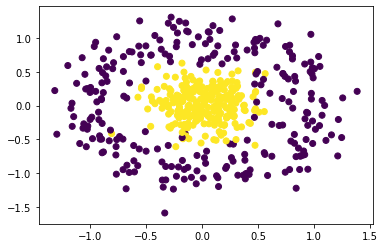

In [3]:
# Testing on circles dataset
X, Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

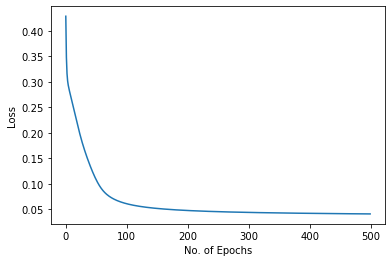

W1:  (2, 4)
A1:  (500, 4)
W2:  (4, 3)
A2:  (500, 3)
W3:  (3, 2)
Y_:  (500, 2)


In [4]:
ANN = NeuralNetwork(input_size=2, layers=[4, 3], output_size=2)
train_loss = ANN.train(X, Y, epochs=500, learning_rate=0.001)
plt.plot(train_loss)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()
ANN.summary()

In [5]:
y_pred = ANN.predict(X)
Y = Y.reshape((Y.shape[0], 1))
train_acc = np.mean(y_pred==Y)
print(train_acc)

0.97


# Testing on XOR data

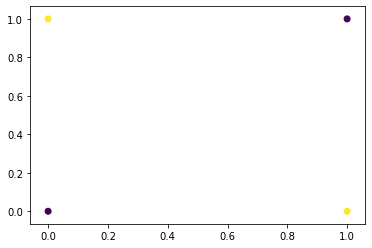

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
plt.scatter(X[:, 0], X[:, 1], c=Y.reshape((-1, )))
plt.show()

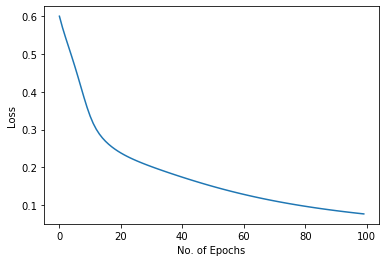

W1:  (2, 10)
A1:  (4, 10)
W2:  (10, 5)
A2:  (4, 5)
W3:  (5, 2)
Y_:  (4, 2)


In [7]:
ANN = NeuralNetwork(input_size=2, layers=[10, 5], output_size=2)
train_loss = ANN.train(X, Y, epochs=100, learning_rate=0.01)
plt.plot(train_loss)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()
ANN.summary()

In [8]:
y_pred = ANN.predict(X)
train_acc = np.mean(y_pred==Y)
print(train_acc)

1.0
